In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
import numpy as np
from pathlib import Path
import torch

import matplotlib.pyplot as plt

In [7]:
from turboflow.datasets.turb2D import Turb2D
data_path = Path('/','home','dicarlo_d','Documents','Datasets','Turb2D.hdf5')
turb2D = Turb2D(data_path)

In [8]:
t = np.arange(1000)
turb2D.load_data(t)

In [20]:
xy = torch.from_numpy(turb2D.xy)
uv = torch.from_numpy(turb2D.uv)
print(xy.shape)
print(uv.shape)

torch.Size([1000, 256, 256, 2])
torch.Size([1000, 256, 256, 2])


## Turbulent Kinetic Energy

tensor([[0.2861, 0.2900, 0.2960,  ..., 0.2890, 0.2857, 0.2846],
        [0.2733, 0.2751, 0.2799,  ..., 0.2831, 0.2783, 0.2746],
        [0.2628, 0.2622, 0.2655,  ..., 0.2790, 0.2729, 0.2669],
        ...,
        [0.3308, 0.3383, 0.3467,  ..., 0.3151, 0.3178, 0.3236],
        [0.3161, 0.3226, 0.3302,  ..., 0.3057, 0.3064, 0.3102],
        [0.3008, 0.3062, 0.3130,  ..., 0.2968, 0.2953, 0.2968]],
       dtype=torch.float64)
tensor(0.4993, dtype=torch.float64)


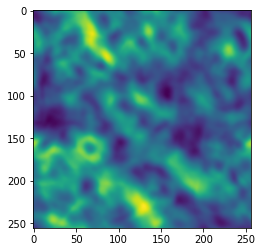

In [24]:
uv_prime = uv - torch.mean(uv, dim=0) # remove the mean
tke = 0.5 * (torch.sum(torch.mean(uv_prime**2, dim=0), dim=-1))
print(tke)
print(tke.mean())
plt.imshow(tke)
plt.show()

In [26]:
rms = torch.sqrt((2./3.)*tke)
print(rms)

tensor([[0.4368, 0.4397, 0.4442,  ..., 0.4389, 0.4364, 0.4356],
        [0.4269, 0.4282, 0.4319,  ..., 0.4345, 0.4307, 0.4279],
        [0.4186, 0.4181, 0.4207,  ..., 0.4313, 0.4266, 0.4219],
        ...,
        [0.4696, 0.4749, 0.4808,  ..., 0.4583, 0.4603, 0.4644],
        [0.4590, 0.4638, 0.4692,  ..., 0.4515, 0.4519, 0.4547],
        [0.4478, 0.4518, 0.4568,  ..., 0.4448, 0.4437, 0.4448]],
       dtype=torch.float64)


In [ ]:
Re = 3000
nu = 1/Re

print('TKE', phy.tkenergy(uv).item())
print('Dissipation', phy.dissipation(uv, viscosity=nu).item())
print('RMSE', phy.rmsvelocity(uv).item())
print('Taylor Micro scale', phy.tmscale(uv, viscosity=nu).item())
print('Taylor-scale Reynolds', phy.tsreynolds(uv, viscosity=nu).item())
print('Kolmogorov Time', phy.ktimescale(uv, viscosity=nu))
print('Kolmogorov Lenght', phy.klenscale(uv, viscosity=nu))
print('Integral scale', phy.intscale(uv))